## Paramétrisation de NACA 4 chiffres

À nouveau nous chargeons les modules nécessaires pour le TD :
- `numpy` pour créer des tableaux de vecteurs
- `matplotlib.pyplot` pour les tracés
- La classe de profil NACA 4 chiffres que nous avons édité.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from module.NACA_airfoil_shape import NACA_Airfoil

In [2]:
plt.rcParams['figure.dpi'] = 100

Le profil NACA 4 chiffres est défini par 4 paramètres : 
- Sa corde $c$ qui sert à adimensionner toutes les autres coordonnées et n'apparaît plus dans les expressions
- Sa cambrure maximum $m$ en pourcentage de corde
- La position $p$ de cette cambrure maximum sur le long de la ligne de corde (en dixième de corde)
- L'épaisseur maximum $t$ du profil en pourcentage de corde

La loi d'épaisseur $y_t$ est une fonction en puissance de la coordonnées de corde adimensionnée : $x^* = \frac{x}{c}$

\begin{equation}
y_t(x^*) = 5 \, t  \left(0.2966 \sqrt{x^*} -0.1260 \, x^* -0.3516 \, {x^*}^2 + 0.2843 \, {x^*}^3 -0.1015 \, {x^*}^4\right)
\end{equation}

La loi de cambrure  $y_c$ est un polynome d'ordre 2 défini par morceau :

\begin{equation}
y_c(x^*) = \left\{
\begin{array}{ll}
\frac{m}{p^2} \left(2 p x^*-{x^*}^2\right) & \text{si } x_c<p \\
\frac{m}{\left(1-p\right)^2} \left(1 -2 \, p + 2 p x^*-{x^*}^2 \right) & \text{si } x_c>p
\end{array} \right.
\end{equation}

La dérivée de la loi de cambrure  $\frac{d y_c}{d x_c}$ est nécessaire pour construire le profil :

\begin{equation}
\frac{d y_c}{d x_c} (x^*)= \left\{
\begin{array}{ll}
\frac{2 m }{p^2} \left(p-x^*\right) & \text{si } x_c<p \\
\frac{2 m }{\left(1-p\right)^2} \left(p-x^*\right) & \text{si } x_c>p
\end{array} \right.
\end{equation}

 Nous pouvons créer les instances pour deux profils en utilisant la classe `NACA_Airfoil`. Par défaut, la corde est prise égale à $c=1.0$ m. On peut la changer en passant le paramètre optionnel `chord`.

In [3]:
C = 1.0 
naca0012 = NACA_Airfoil('0012', chord=C)
naca2412 = NACA_Airfoil('2412', chord=C)

### Discrétisation linéaire

Définissons la discrétisation de la corde

In [4]:
npts = 10 
x = np.linspace(0, C, npts)

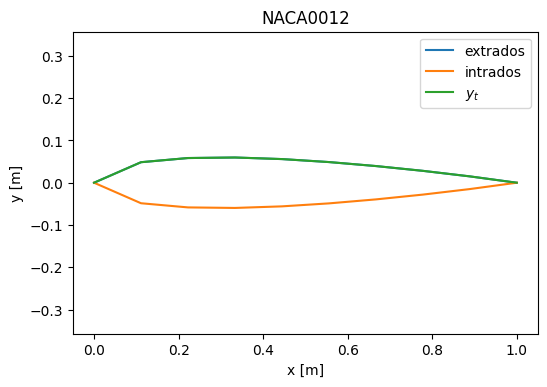

In [5]:
XU,YU,XL,YL = naca0012.profile_side_shape(x)
plt.plot(XU,YU,label='extrados')
plt.plot(XL,YL,label='intrados')
plt.plot(x,naca0012.shape,label=r'$y_t$')
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NACA0012')
plt.show()

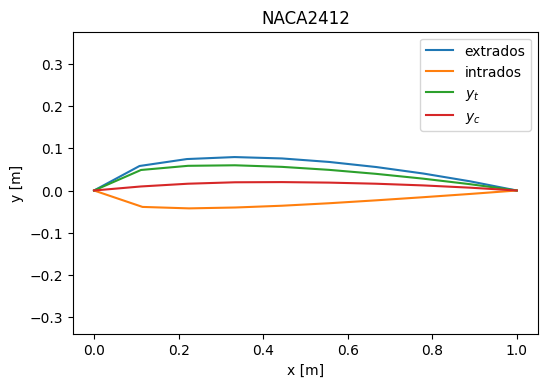

In [6]:
XU,YU,XL,YL = naca2412.profile_side_shape(x)
plt.plot(XU,YU,label='extrados')
plt.plot(XL,YL,label='intrados')
plt.plot(x,naca2412.shape,label=r'$y_t$')
plt.plot(x,naca2412.mean_camber_line,label=r'$y_c$')
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NACA2412')
plt.show()

On peut améliorer la forme en augmentant le nombre de point de discrétisation `npts`.

In [7]:
npts = 25
x_fine = np.linspace(0, C, npts)

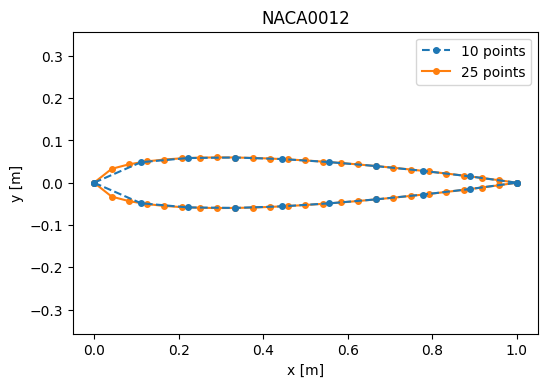

In [8]:
XU,YU,XL,YL = naca0012.profile_side_shape(x)
plt.plot(XU,YU,label='10 points',marker='o',ms=4,color='C0',linestyle='--')
plt.plot(XL,YL,marker='o',ms=4,color='C0',linestyle='--')
XU,YU,XL,YL = naca0012.profile_side_shape(x_fine)
plt.plot(XU,YU,label='25 points',marker='o',ms=4,color='C1',zorder=0)
plt.plot(XL,YL,marker='o',ms=4,color='C1',zorder=0)
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NACA0012')
plt.show()

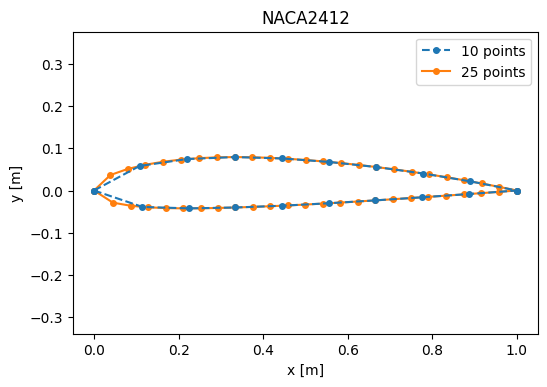

In [9]:
XU,YU,XL,YL = naca2412.profile_side_shape(x)
plt.plot(XU,YU,label='10 points',marker='o',ms=4,color='C0',linestyle='--')
plt.plot(XL,YL,marker='o',ms=4,color='C0',linestyle='--')
XU,YU,XL,YL = naca2412.profile_side_shape(x_fine)
plt.plot(XU,YU,label='25 points',marker='o',ms=4,color='C1',zorder=0)
plt.plot(XL,YL,marker='o',ms=4,color='C1',zorder=0)
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NACA2412')
plt.show()

### Discrétisation de Glauert

On peut également distribuer non uniformément les points de manière à mieux discrétiser le bord d'attaque et de fuite. Pour se faire nous pouvons utiliser la transformée de Glauert qui nous sera très utile dans la suite du cours. 
\begin{align}
x = \frac{c}{2} \left(1 - \cos{\theta} \right)
\end{align}

In [10]:
npts = 10 
theta = np.linspace(0, np.pi, npts)
x_glauert = C/2 * (1-np.cos(theta))

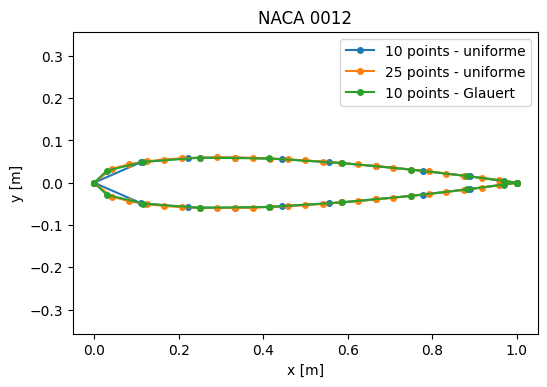

In [11]:
XU,YU,XL,YL = naca0012.profile_side_shape(x)
plt.plot(XU,YU,label='10 points - uniforme',marker='o',ms=4,color = 'C0')
plt.plot(XL,YL,marker='o',ms=4,color = 'C0')
XU,YU,XL,YL = naca0012.profile_side_shape(x_fine)
plt.plot(XU,YU,label='25 points - uniforme',marker='o',ms=4,color = 'C1')
plt.plot(XL,YL,marker='o',ms=4,color = 'C1')
XU,YU,XL,YL = naca0012.profile_side_shape(x_glauert)
plt.plot(XU,YU,label='10 points - Glauert',marker='o',ms=4,color = 'C2')
plt.plot(XL,YL,marker='o',ms=4,color = 'C2')
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NACA 0012')
plt.show()

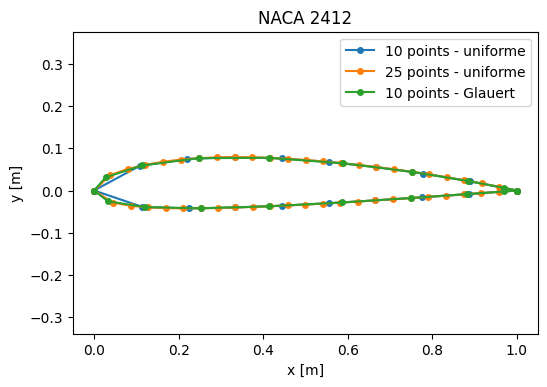

In [12]:
XU,YU,XL,YL = naca2412.profile_side_shape(x)
plt.plot(XU,YU,label='10 points - uniforme',marker='o',ms=4,color = 'C0')
plt.plot(XL,YL,marker='o',ms=4,color = 'C0')
XU,YU,XL,YL = naca2412.profile_side_shape(x_fine)
plt.plot(XU,YU,label='25 points - uniforme',marker='o',ms=4,color = 'C1')
plt.plot(XL,YL,marker='o',ms=4,color = 'C1')
XU,YU,XL,YL = naca2412.profile_side_shape(x_glauert)
plt.plot(XU,YU,label='10 points - Glauert',marker='o',ms=4,color = 'C2')
plt.plot(XL,YL,marker='o',ms=4,color = 'C2')
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('NACA 2412')
plt.show()

Avec très peu de points on a une forme de profil bien définie grace à la transformation de Glauert. 

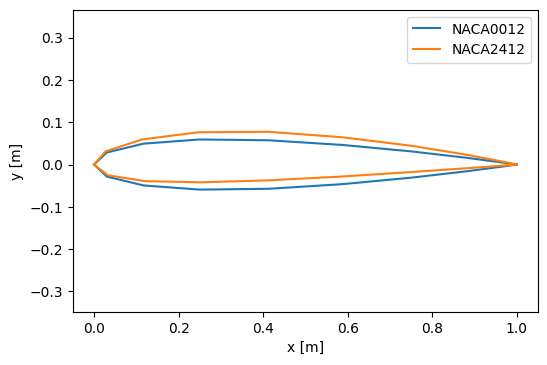

In [13]:
XU,YU,XL,YL = naca0012.profile_side_shape(x_glauert)
plt.plot(XU,YU,label='NACA0012',color = 'C0')
plt.plot(XL,YL,color = 'C0')
XU,YU,XL,YL = naca2412.profile_side_shape(x_glauert)
plt.plot(XU,YU,label='NACA2412',color = 'C1')
plt.plot(XL,YL,color = 'C1')
plt.axis('equal')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

Entre un profil NACA0012 et NACA2412 seule la cambrure est modifiée. 